In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df=pd.read_csv(r'C:\Users\user\Desktop\workspace\ML practice\Datasets\wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [76]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [77]:
x,y=df.drop(columns=['Class label']),df['Class label']

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
x_train.head()

,Alcohol,Malic acid
138,13.49,3.59
104,12.51,1.73
78,12.33,0.99
36,13.28,1.64
93,12.29,2.83


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

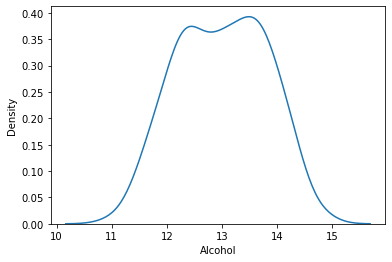

In [47]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

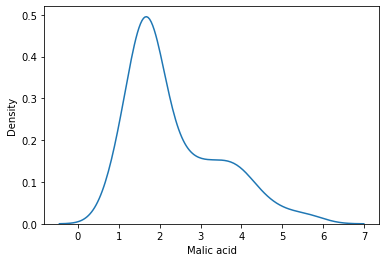

In [48]:
sns.kdeplot(df['Malic acid'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

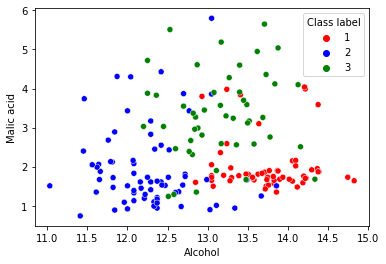

In [49]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

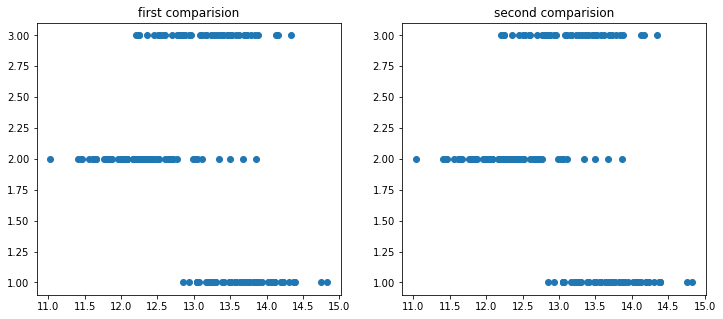

In [50]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(df['Alcohol'],df['Class label'])
ax1.set_title("first comparision")

ax2.scatter(df['Alcohol'],df['Class label'])
ax2.set_title("second comparision")

plt.show()


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [60]:
from sklearn.preprocessing import Normalizer

In [61]:
x_train.head()

,Alcohol,Malic acid
138,13.49,3.59
104,12.51,1.73
78,12.33,0.99
36,13.28,1.64
93,12.29,2.83


In [62]:
scaler=Normalizer()
x_train_scaled=scaler.fit_transform(x_train)

In [63]:
x_test_scaled=scaler.transform(x_test)

In [65]:
x_train_scaled=pd.DataFrame(x_train,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test,columns=x_test.columns)

In [67]:
x_train_scaled

,Alcohol,Malic acid
138,13.49,3.59
104,12.51,1.73
78,12.33,0.99
36,13.28,1.64
93,12.29,2.83
...,...,...
71,13.86,1.51
106,12.25,1.73
14,14.38,1.87
92,12.69,1.53


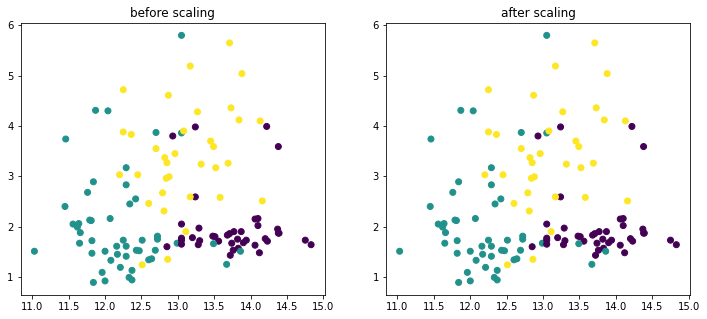

In [69]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Alcohol'],x_train['Malic acid'],c=y_train)
ax1.set_title("before scaling")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("after scaling")
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

<AxesSubplot:title={'center':'After scaling'}, xlabel='Alcohol', ylabel='Density'>

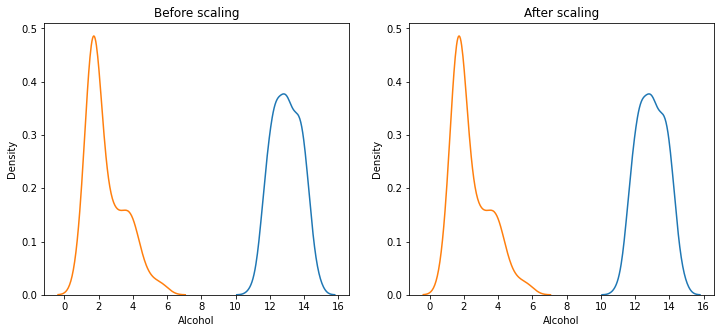

In [73]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title("Before scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

#after scaling
ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)

In [79]:
from sklearn.linear_model import LogisticRegression

In [81]:
model=LogisticRegression()

In [82]:
model.fit(x_train,y_train)

LogisticRegression()

In [85]:
y_pred=model.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7407407407407407

In [87]:
#min-max 
from sklearn.preprocessing import minmax_scale

In [92]:
x_train_scaled=minmax_scale(x_train)

In [95]:
x_test_scaled=minmax_scale(x_test)

In [94]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [96]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [98]:
from sklearn.linear_model import LogisticRegression

In [101]:
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [103]:
y_pred=model.predict(x_test)

In [108]:
y_test

19     1
45     1
140    3
30     1
67     2
16     1
119    2
174    3
109    2
141    3
24     1
150    3
41     1
118    2
15     1
111    2
113    2
82     2
9      1
114    2
18     1
66     2
60     2
169    3
171    3
164    3
117    2
65     2
90     2
55     1
29     1
128    2
145    3
31     1
12     1
42     1
158    3
137    3
98     2
159    3
38     1
108    2
85     2
68     2
143    3
2      1
100    2
122    2
154    3
51     1
76     2
56     1
26     1
153    3
Name: Class label, dtype: int64

In [107]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test,y_pred)

0.35185185185185186